# **Digit Recogniser with CNN in Keras**

#### **Objective**

1. Understand how a basic image classification pipeline with CNN is done
2. Use of the Keras library
3. How image dataset is prepared for model training

#### **Outline**

1. Load Libraries
2. Load Dataset
3. Normalise to range [0,1]
4. Reshape
5. One hot encoding for Target Label
6. Train Test Split
7. Create CNN model
8. Add convolutional layers, max pooling, dropout, optimiser
9. Data Augmentation
10. Fit
11. Evaluate 

#### **Load Libraries**

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

#### **Load Dataset**

In [92]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [93]:
train.shape

(42000, 785)

42,000 features, 785 columns. Image is 28 x 28 matrix (784).

In [94]:
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
test.shape

(28000, 784)

In [96]:
test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# Put labels into y_train variable
Y_train = train['label']

# Drop 'label' column
X_train = train.drop(columns= ['label'])

#### **Plot Some Samples**

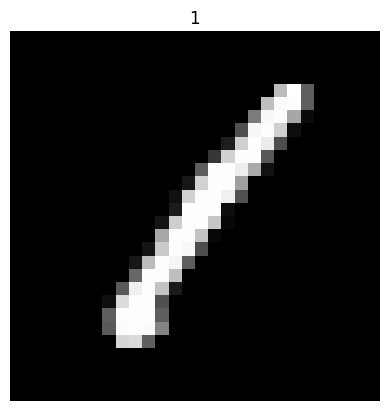

In [98]:
# Select row and convert to numpy array
img = X_train.iloc[0].values

# Reshape 1D array to 2D array
img = img.reshape((28,28))

# Plot as grayscale image
plt.imshow(img, cmap='gray')

plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

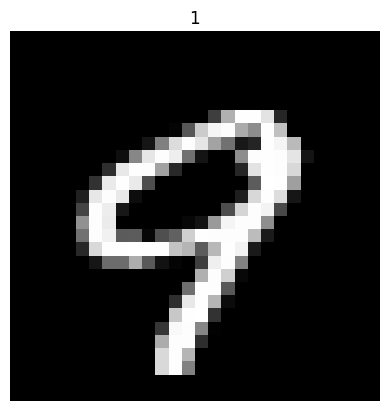

In [99]:
# Select row and convert to numpy array
img = X_train.iloc[100].values

# Reshape 1D array to 2D array
img = img.reshape((28,28))

# Plot as grayscale image
plt.imshow(img, cmap='gray')

plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

#### **Normalisation**

Purpose: To scale the pixel values to a standard range, usually [0, 1] or [-1, 1].

Reasons:

- Reduce Illumination Differences: Normalizing pixel values helps reduce the effects of varying lighting conditions in the images. This makes the model more robust to changes in illumination.
- Faster Convergence: When the input values are normalized, the gradients during backpropagation are more stable, leading to faster convergence during training. This helps the CNN to learn more efficiently and effectively.

In [100]:
np.unique(X_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Before it contained values between 0 - 255 (shades of grey included).

In [101]:
X_train = X_train / 255.0
test = test / 255.0

In [102]:
np.unique(X_train)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

Now its normalised, allowing the CNN to learn faster.

#### **Reshape**

Reshape the array to a 28x28 matrix (pixel size of the image)

In [103]:
# '1' is to indicate channel, for greyscale is 1, color is 3
# '-1' is to automatically infer number of samples through number of rows
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

#### **Label Encoding**

Encode the classes into one hot encoded arrays, to ensure no ordinal relationship between labels.

eg:<br>
0 => [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] <br>
1 => [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]<br>
2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]<br>
...<br>
9 => [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]<br>


In [104]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

#### **Train Test Split**

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


#### **Implementing CNN with Keras**

In [106]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


#### **Create instance of Sequential class, used to build NN in a layer-by-layer manner**

In [107]:
model = Sequential()

#### **Add Convolutional Layer**

In [108]:
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))

- **Conv2D**: Adds a 2D convolutional layer to the model.
- **filters = 8**: Specifies that the layer will have 8 filters (or kernels). Each filter will learn to detect different features in the input images.
- **kernel_size** = (5,5): Specifies the size of the convolutional kernel (5x5). This means each filter will be a 5x5 matrix.
- **paddin**g = 'Same': Specifies that padding should be applied to the input image so that the output has the same width and height as the input. This is achieved by adding zeros around the border of the input image.
- **activation** = 'relu': Specifies the ReLU (Rectified Linear Unit) activation function, which introduces non-linearity to the model.
- **input_shape** = (28,28,1): Specifies the shape of the input image. Here, the input images are 28x28 pixels with 1 channel (grayscale). This parameter is only required in the first layer of the model.

#### **Add Max Pooling Layer**

In [109]:
model.add(MaxPool2D(pool_size=(2,2)))

- **MaxPool2D**: Adds a 2D max pooling layer to the model.
- **pool_size=(2,2)**: Specifies the size of the pooling window (2x2). Max pooling reduces the spatial dimensions (width and height) of the input by taking the maximum value in each 2x2 block. This helps in reducing the computational complexity and controlling overfitting.

#### **Add Dropout Layer**

In [110]:
model.add(Dropout(0.25))

- **Dropout**: Adds a dropout layer to the model.
- **rate = 0.25**: Specifies the dropout rate, which is the fraction of input units to drop (set to 0) during training. Here, 25% of the neurons in the layer will be randomly set to 0 at each update during training. Dropout is used to prevent overfitting by ensuring that the model does not rely too heavily on any individual neurons.

In [111]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

#### **Define Optimizer**

Adam (Adaptive Moment Estimation) is an adaptive learning rate optimization algorithm that adjusts the learning rate for each parameter individually, using the first and second moments of the gradients. This optimizer is widely used due to its efficiency and robustness in training deep learning models.

In [112]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

#### **Compile Model**

Specify the necessary configurations to be used for the model.

In [113]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

#### **Set Epochs and Batch Size**

**One epoch** = one forward pass and one backward pass of all the training examples <br><br>
**Batch size** = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need. <br><br>
**Number of iterations** = number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes)

In [114]:
epochs = 10 
batch_size = 250

#### **Data Augmentation**

1. Artificially expand the size of a training dataset
2. Improve the generalization ability
3. Keras provides the ImageDataGenerator class

In [115]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [116]:
# Computes the statistics (mean, standard deviation, principal components, etc.) required for these transformations.
datagen.fit(X_train)

#### **Fit the model**

`datagen.flow` is used to generates batches of augmented data from the training data `(X_train)` and corresponding labels `(Y_train)`. 

In [117]:
# Fit the model
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
    epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 8s 48ms/step - loss: 0.9215 - accuracy: 0.7149 - val_loss: 0.2439 - val_accuracy: 0.9371
Epoch 2/10
151/151 [==============================] - 7s 47ms/step - loss: 0.3368 - accuracy: 0.9026 - val_loss: 0.1361 - val_accuracy: 0.9671
Epoch 3/10
151/151 [==============================] - 7s 47ms/step - loss: 0.2229 - accuracy: 0.9350 - val_loss: 0.1125 - val_accuracy: 0.9679
Epoch 4/10
151/151 [==============================] - 7s 48ms/step - loss: 0.1858 - accuracy: 0.9435 - val_loss: 0.1128 - val_accuracy: 0.9698
Epoch 5/10
151/151 [==============================] - 7s 47ms/step - loss: 0.1624 - accuracy: 0.9528 - val_loss: 0.0836 - val_accuracy: 0.9790
Epoch 6/10
151/151 [==============================] - 7s 46ms/step - loss: 0.1431 - accuracy: 0.9562 - val_loss: 0.0874 - val_accuracy: 0.9769
Epoch 7/10
151/151 [==============================] - 7s 46ms/step - loss: 0.1374 - accuracy: 0.9579 - val_loss: 0.0943 - val_accuracy: 0.9748

#### **Evaluate the model**

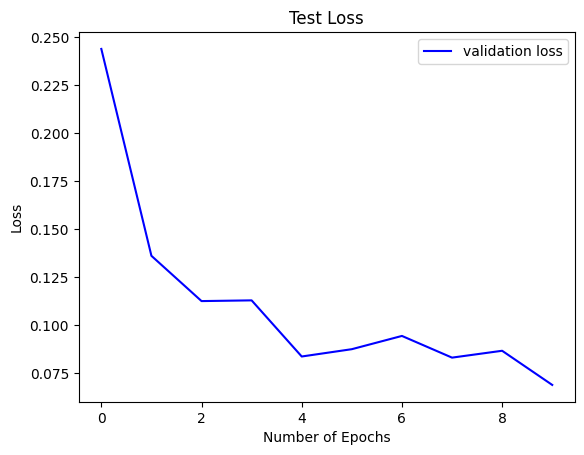

In [118]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

As the number of epochs increases, the test loss decreases. Thus model is learning well.

132/132 [==============================] - 0s 2ms/step


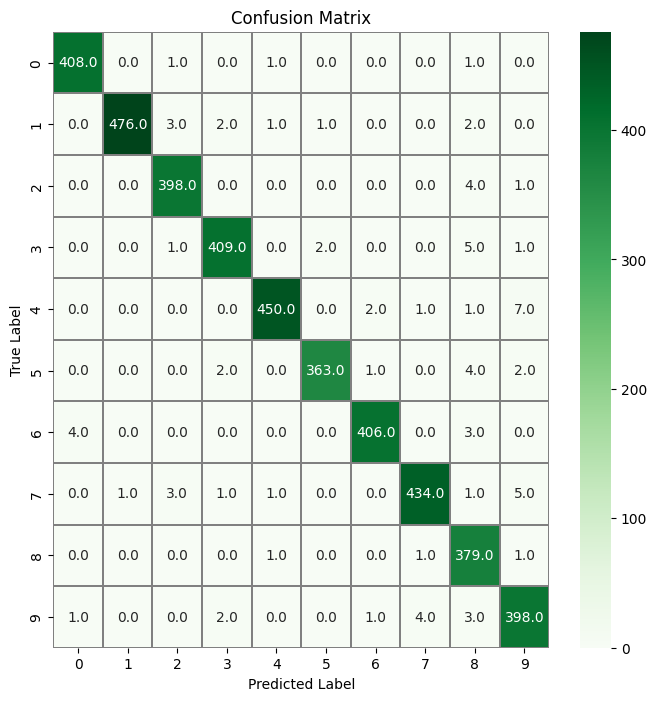

In [119]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#### **Results**

1. 1 has the higest rate of correct classifications (476 instances correct)
2. 5 has the lowest rate of correct classifications (363 instances correct)